In [2]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

#Dogs face detection imports:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image             
from tqdm import tqdm
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import numpy as np
import glob

Using TensorFlow backend.


In [3]:
import os
#print(os.listdir('Data_train/dataset/training_set/dogs'))

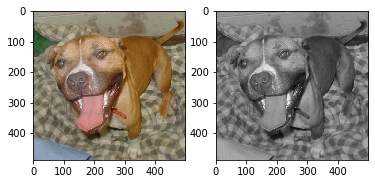

In [85]:
im = cv2.imread("Data_train/dataset/training_set/dogs/dog.6.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.imshow(im, ©")

[[[ 79  99 104]
  [ 40  65  69]
  [ 26  54  55]
  ...
  [ 52  87  91]
  [ 42  77  80]
  [ 69 101 106]]

 [[ 89 108 111]
  [ 47  68  70]
  [ 25  48  50]
  ...
  [ 52  87  90]
  [ 41  76  79]
  [ 67 100 103]]

 [[ 87 106 109]
  [ 47  68  70]
  [ 32  56  56]
  ...
  [ 51  86  89]
  [ 41  76  79]
  [ 65  98 101]]

 ...

 [[ 79 125 159]
  [ 72 118 152]
  [ 69 115 149]
  ...
  [  0   0   4]
  [  0   5   9]
  [  4  12  19]]

 [[ 82 129 161]
  [ 76 123 155]
  [ 71 118 150]
  ...
  [  0   1   5]
  [  3  12  16]
  [  9  17  24]]

 [[ 84 131 163]
  [ 76 123 155]
  [ 73 120 152]
  ...
  [  0   8  12]
  [  8  17  21]
  [ 10  18  25]]]


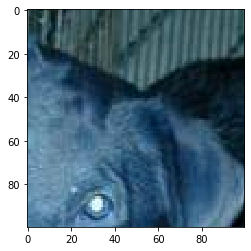

In [86]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 3)
    x,y,w,h = faces[0]
    face = img[y:y+h,x:x+w]
    plt.imshow(face)
    return face
h = face_detector("Data_train/dataset/training_set/dogs/dog.1.jpg")
print(h)
plt.imshow(h)

In [5]:
ResNet50_model_ = ResNet50(weights='imagenet')

In [6]:
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

In [12]:

def ResNet50_predict_labels(img_path):
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model_.predict(img))
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [14]:
for i in range(1,50): 
    img_path=f"Data_train/dataset/training_set/dogs/dog.{i}.jpg"
    print(dog_detector(img_path))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True


# Funcion que genera el np array

Tamaño de la foto 28,28, 3 (por incluir color) 

In [4]:
def createnp(path):
    img_data_list=[]

    for img in glob.glob(path):
        print(img)
        input_img=cv2.imread(img)
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(60,60))
        img_data_list.append(input_img_resize)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    img_data.shape
    return img_data
img_data = createnp('Dogs/*/*')
print(img_data.shape)

Dogs/n02097658-silky_terrier/n02097658_26.jpg
Dogs/n02097658-silky_terrier/n02097658_4869.jpg
Dogs/n02097658-silky_terrier/n02097658_595.jpg
Dogs/n02097658-silky_terrier/n02097658_9222.jpg
Dogs/n02097658-silky_terrier/n02097658_422.jpg
Dogs/n02097658-silky_terrier/n02097658_1326.jpg
Dogs/n02097658-silky_terrier/n02097658_7970.jpg
Dogs/n02097658-silky_terrier/n02097658_10567.jpg
Dogs/n02097658-silky_terrier/n02097658_1469.jpg
Dogs/n02097658-silky_terrier/n02097658_1086.jpg
Dogs/n02097658-silky_terrier/n02097658_1910.jpg
Dogs/n02097658-silky_terrier/n02097658_5223.jpg
Dogs/n02097658-silky_terrier/n02097658_2766.jpg
Dogs/n02097658-silky_terrier/n02097658_3693.jpg
Dogs/n02097658-silky_terrier/n02097658_10997.jpg
Dogs/n02097658-silky_terrier/n02097658_10559.jpg
Dogs/n02097658-silky_terrier/n02097658_11242.jpg
Dogs/n02097658-silky_terrier/n02097658_3484.jpg
Dogs/n02097658-silky_terrier/n02097658_7619.jpg
Dogs/n02097658-silky_terrier/n02097658_4890.jpg
Dogs/n02097658-silky_terrier/n02097658_1

Dogs/n02092002-Scottish_deerhound/n02092002_3861.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_2558.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_14917.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_6702.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_847.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_12977.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_846.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_7743.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_9785.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_885.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_1130.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_15215.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_4921.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_305.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_2217.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_5222.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_5008.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_5746.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_151

Dogs/n02092002-Scottish_deerhound/n02092002_9071.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_4555.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_817.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_1438.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_6380.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_7539.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_1564.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_7667.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_2723.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_7172.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_3314.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_6907.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_15342.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_11087.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_4296.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_1339.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_1890.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_6735.jpg
Dogs/n02092002-Scottish_deerhound/n02092002_3

Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1922.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_3149.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1776.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1212.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_68.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_3203.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_3565.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_3940.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1830.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_2646.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1575.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_2068.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_4419.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_171.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_1987.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_415.jpg
Dogs/n02099849-Chesapeake_Bay_retriever/n02099849_4180.jpg
D

Dogs/n02091244-Ibizan_hound/n02091244_25.jpg
Dogs/n02091244-Ibizan_hound/n02091244_3939.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1690.jpg
Dogs/n02091244-Ibizan_hound/n02091244_487.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1496.jpg
Dogs/n02091244-Ibizan_hound/n02091244_2941.jpg
Dogs/n02091244-Ibizan_hound/n02091244_530.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1938.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1045.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1737.jpg
Dogs/n02091244-Ibizan_hound/n02091244_3874.jpg
Dogs/n02091244-Ibizan_hound/n02091244_1252.jpg
Dogs/n02091244-Ibizan_hound/n02091244_2820.jpg
Dogs/n02091244-Ibizan_hound/n02091244_486.jpg
Dogs/n02091244-Ibizan_hound/n02091244_2407.jpg
Dogs/n02091244-Ibizan_hound/n02091244_645.jpg
Dogs/n02091244-Ibizan_hound/n02091244_3321.jpg
Dogs/n02091244-Ibizan_hound/n02091244_5989.jpg
Dogs/n02091244-Ibizan_hound/n02091244_3320.jpg
Dogs/n02091244-Ibizan_hound/n02091244_283.jpg
Dogs/n02091244-Ibizan_hound/n02091244_3240.jpg
Dogs/n02091244-Ibiza

Dogs/n02095314-wire-haired_fox_terrier/n02095314_2754.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_318.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1705.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_2230.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_669.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1704.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_2609.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1894.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1116.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1100.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1672.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_2421.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_2964.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_2742.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_1505.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_252.jpg
Dogs/n02095314-wire-haired_fox_terrier/n02095314_3299.jpg
Dogs/n02095314-wi

Dogs/n02091831-Saluki/n02091831_2391.jpg
Dogs/n02091831-Saluki/n02091831_3064.jpg
Dogs/n02091831-Saluki/n02091831_4087.jpg
Dogs/n02091831-Saluki/n02091831_12881.jpg
Dogs/n02091831-Saluki/n02091831_4246.jpg
Dogs/n02091831-Saluki/n02091831_6451.jpg
Dogs/n02091831-Saluki/n02091831_6323.jpg
Dogs/n02091831-Saluki/n02091831_699.jpg
Dogs/n02091831-Saluki/n02091831_2838.jpg
Dogs/n02091831-Saluki/n02091831_11224.jpg
Dogs/n02091831-Saluki/n02091831_55.jpg
Dogs/n02091831-Saluki/n02091831_3846.jpg
Dogs/n02091831-Saluki/n02091831_3675.jpg
Dogs/n02091831-Saluki/n02091831_1512.jpg
Dogs/n02091831-Saluki/n02091831_3339.jpg
Dogs/n02091831-Saluki/n02091831_843.jpg
Dogs/n02091831-Saluki/n02091831_3067.jpg
Dogs/n02091831-Saluki/n02091831_2344.jpg
Dogs/n02091831-Saluki/n02091831_5359.jpg
Dogs/n02091831-Saluki/n02091831_11421.jpg
Dogs/n02091831-Saluki/n02091831_6308.jpg
Dogs/n02091831-Saluki/n02091831_7957.jpg
Dogs/n02091831-Saluki/n02091831_1507.jpg
Dogs/n02091831-Saluki/n02091831_3310.jpg
Dogs/n02091831-Sa

Dogs/n02104365-schipperke/n02104365_7927.jpg
Dogs/n02104365-schipperke/n02104365_6755.jpg
Dogs/n02104365-schipperke/n02104365_1166.jpg
Dogs/n02104365-schipperke/n02104365_8630.jpg
Dogs/n02104365-schipperke/n02104365_8156.jpg
Dogs/n02104365-schipperke/n02104365_9248.jpg
Dogs/n02104365-schipperke/n02104365_5670.jpg
Dogs/n02104365-schipperke/n02104365_518.jpg
Dogs/n02104365-schipperke/n02104365_9712.jpg
Dogs/n02104365-schipperke/n02104365_7065.jpg
Dogs/n02104365-schipperke/n02104365_6384.jpg
Dogs/n02104365-schipperke/n02104365_1158.jpg
Dogs/n02104365-schipperke/n02104365_7501.jpg
Dogs/n02104365-schipperke/n02104365_7887.jpg
Dogs/n02104365-schipperke/n02104365_7892.jpg
Dogs/n02104365-schipperke/n02104365_725.jpg
Dogs/n02104365-schipperke/n02104365_7956.jpg
Dogs/n02104365-schipperke/n02104365_9238.jpg
Dogs/n02104365-schipperke/n02104365_3649.jpg
Dogs/n02104365-schipperke/n02104365_6527.jpg
Dogs/n02104365-schipperke/n02104365_7822.jpg
Dogs/n02104365-schipperke/n02104365_6693.jpg
Dogs/n021043

Dogs/n02090622-borzoi/n02090622_1253.jpg
Dogs/n02090622-borzoi/n02090622_2968.jpg
Dogs/n02090622-borzoi/n02090622_7409.jpg
Dogs/n02090622-borzoi/n02090622_6449.jpg
Dogs/n02090622-borzoi/n02090622_10492.jpg
Dogs/n02090622-borzoi/n02090622_7351.jpg
Dogs/n02090622-borzoi/n02090622_4103.jpg
Dogs/n02090622-borzoi/n02090622_1047.jpg
Dogs/n02090622-borzoi/n02090622_6106.jpg
Dogs/n02090622-borzoi/n02090622_9786.jpg
Dogs/n02090622-borzoi/n02090622_6894.jpg
Dogs/n02090622-borzoi/n02090622_7142.jpg
Dogs/n02090622-borzoi/n02090622_7619.jpg
Dogs/n02090622-borzoi/n02090622_5556.jpg
Dogs/n02090622-borzoi/n02090622_8674.jpg
Dogs/n02090622-borzoi/n02090622_8338.jpg
Dogs/n02090622-borzoi/n02090622_7962.jpg
Dogs/n02090622-borzoi/n02090622_7960.jpg
Dogs/n02090622-borzoi/n02090622_6303.jpg
Dogs/n02090622-borzoi/n02090622_6713.jpg
Dogs/n02090622-borzoi/n02090622_1726.jpg
Dogs/n02090622-borzoi/n02090622_2987.jpg
Dogs/n02090622-borzoi/n02090622_5025.jpg
Dogs/n02090622-borzoi/n02090622_8703.jpg
Dogs/n02090622-

Dogs/n02113023-Pembroke/n02113023_1360.jpg
Dogs/n02113023-Pembroke/n02113023_3563.jpg
Dogs/n02113023-Pembroke/n02113023_6341.jpg
Dogs/n02113023-Pembroke/n02113023_7062.jpg
Dogs/n02113023-Pembroke/n02113023_6383.jpg
Dogs/n02113023-Pembroke/n02113023_2330.jpg
Dogs/n02113023-Pembroke/n02113023_4796.jpg
Dogs/n02113023-Pembroke/n02113023_4782.jpg
Dogs/n02113023-Pembroke/n02113023_4972.jpg
Dogs/n02113023-Pembroke/n02113023_2287.jpg
Dogs/n02113023-Pembroke/n02113023_1571.jpg
Dogs/n02113023-Pembroke/n02113023_7316.jpg
Dogs/n02113023-Pembroke/n02113023_6801.jpg
Dogs/n02113023-Pembroke/n02113023_3945.jpg
Dogs/n02113023-Pembroke/n02113023_13200.jpg
Dogs/n02113023-Pembroke/n02113023_6140.jpg
Dogs/n02113023-Pembroke/n02113023_4024.jpg
Dogs/n02113023-Pembroke/n02113023_2482.jpg
Dogs/n02113023-Pembroke/n02113023_9306.jpg
Dogs/n02113023-Pembroke/n02113023_4391.jpg
Dogs/n02105505-komondor/n02105505_4325.jpg
Dogs/n02105505-komondor/n02105505_43.jpg
Dogs/n02105505-komondor/n02105505_1077.jpg
Dogs/n021055

KeyboardInterrupt: 

# Simplest possible autoencoder

(2000, 12288)
(2000, 12288)
Train on 2000 samples, validate on 2000 samples
Epoch 1/25
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/25
2000/2000 [==============================] - 2s 843us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/25
2000/2000 [==============================] - 2s 954us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/25
2000/2000 [==============================] - 2s 871us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/25
2000/2000 [==============================] - 2s 806us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 6/25
2000/2000 [==============================] - 2s 841us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 7/25
2000/2000 [==============================] - 2s 856us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 8/25
2000/2000 [==============================] - 2s 859us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 9/25
2000/2000 [==============================] - 2s 929us/step - loss: 0.6931 - val_los

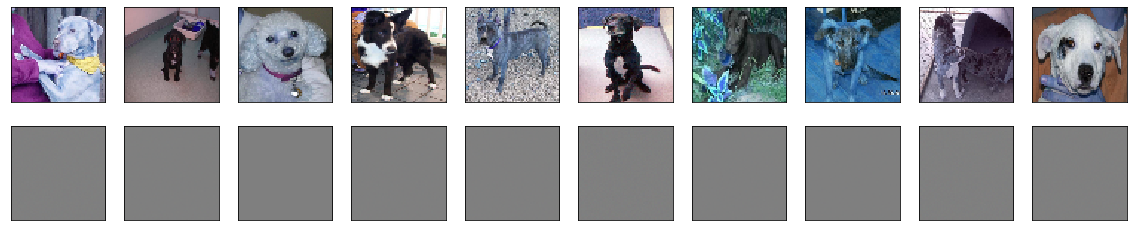

In [310]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(12288,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(12288, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
import numpy as np
(x_train), (x_test) = img_data,img_test
'''x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.'''
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [12]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(60, 60, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np

(x_train), (x_test) = img_data,img_test

'''x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.'''
x_train = np.reshape(x_train, (len(x_train), 64, 64, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 64, 64, 3))  # adapt this if using `channels_first` image data format
print (x_train.shape)
print (x_test.shape)

(1000, 64, 64, 3)
(1000, 64, 64, 3)


In [6]:
'''TERMINAL:
tensorboard --logdir=/tmp/autoencoder'''

'TERMINAL:\ntensorboard --logdir=/tmp/autoencoder'

In [14]:
from keras.callbacks import TensorBoard
print(x_train.shape)
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

(1000, 64, 64, 3)


ValueError: Error when checking target: expected conv2d_14 to have shape (60, 60, 1) but got array with shape (64, 64, 3)

In [332]:
decoded_imgs = autoencoder.predict(x_test)

'''n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()'''

'n = 10\nplt.figure(figsize=(20, 4))\nfor i in range(n):\n    # display original\n    ax = plt.subplot(2, n, i)\n    plt.imshow(x_test[i].reshape(60, 60))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\n\n    # display reconstruction\n    ax = plt.subplot(2, n, i + n)\n    plt.imshow(decoded_imgs[i].reshape(60, 60))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()'

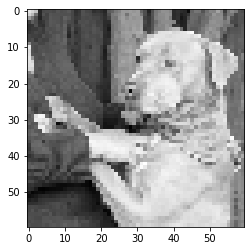

In [333]:
plt.imshow(x_test[0].reshape(60,60))

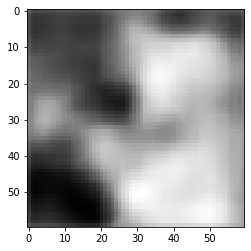

In [334]:

plt.imshow(decoded_imgs[0].reshape(60,60))

In [28]:
(x_train), (x_test) = img_data,img_test

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from keras.models import Model, Sequential,load_model
from keras import backend as K
def build_autoencoder():
    input_img = (220, 220,3)  # adapt this if using `channels_first` image data format
    encoder = Sequential()
    encoder.add(InputLayer(input_img))
    encoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    encoder.add(MaxPooling2D((2, 2), padding='same'))
    encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    encoder.add(MaxPooling2D((2, 2), padding='same'))
    encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    encoder.add(MaxPooling2D((2, 2), padding='same'))
    return encoder

Using TensorFlow backend.


In [2]:
model = build_autoencoder()
model.load_weights('Encoder_81.h5')

In [3]:
!ls test/


foki.jpg   upload.jpg


In [107]:
import glob
import cv2
import numpy as np
import os
def createtest(path):
    '''
    Create a numpy array, returns the np and a list of list:
    list name,ext
    '''
    img_data_list=[]
    count = 0
    names = []
    while True:
        for img in glob.glob(path):
            names.append(img.split('/')[-1].split('.'))
            input_img=cv2.imread(img)
            #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(220,220))
            img_data_list.append(input_img_resize)
            count+=1
        img_data_list = np.array(img_data_list)
        img_data_list = img_data_list.astype('float32')
        img_data_list = img_data_list/255
        return img_data_list,names
            
#test,names = createtest('database/*')

def get_image_person(path='test/upload.jpg'):
    img_data_list=[]
    input_img=cv2.imread(path)
    input_img_resize=cv2.resize(input_img,(220,220))
    img_data_list.append(input_img_resize)
    img_data_list = np.array(img_data_list)
    img_data_list = img_data_list.astype('float32')
    img_data_list = img_data_list/255
    return img_data_list


In [5]:
names

['Kiko-city_ALBA',
 'Liber_Salvandopeludos',
 'Falco_Salvandopeludos',
 'Gaston_ALBA',
 'Zelanda-city_ALBA',
 'Lucano-chin_ALBA',
 'Kangola-city_ALBA',
 'Blanquito_Salvandopeludos',
 'Ona_Salvandopeludos',
 'Rumba_Salvandopeludos']

In [6]:
mod = model.predict(test)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [9]:
print(test.shape)
print(mod.shape)

(10, 220, 220, 3)
(10, 28, 28, 8)


In [10]:
#names = ([f'Dog{i}' for i in range(len(mod))])
def get_image(recomend_name):
    image = list(coll.find({'name':f'{recomend_name}'}))[0].get('url')
    return image

def recomender(vectors,names):
    '''
    vectors = Lista de vectores de las fotos a comparar en la base de datos.
    names = Lista de los nombres de las fotos 3n la lista de vectores.
    img_path = path de la imagen a predecir.
    
    '''
    mod = list(vectors)
    s_N = names
    s = pd.Series(s_N)
    s_vector = ([mod])
    df=pd.DataFrame(s)
    df['Vector']=mod
    df.columns=(['name','X'])
    test_person=get_image_person()
    test_person_pred=model.predict(test_person)
    X_missing=test_person_pred
    df["diffs"] = df["X"].apply(lambda X: np.linalg.norm(X-X_missing))
    results = df.groupby("name").agg({'diffs':'min'}).sort_values(by='diffs')
    #display(results)
    URL = get_image(results.index[0])
    return URL

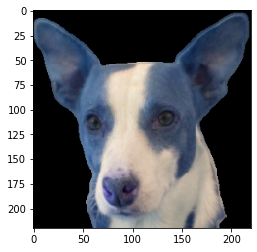

In [11]:
plt.imshow(test[0].reshape(220,220,3))

In [12]:
plt.imshow(test_person[0].reshape(220,220,3))

NameError: name 'test_person' is not defined

# Mongo DB

In [84]:
from pymongo import MongoClient
import os
from dotenv import load_dotenv
load_dotenv()

#Get Password
connection = os.getenv('URLMONGO')
#Connect to DB
client = MongoClient(connection)
def connectCollection(database, collection):
    db = client[database]
    coll = db[collection]
    print('Connected')
    return db, coll


In [85]:
db,coll=connectCollection('findyourdog', 'dogs')

Connected


In [109]:
def load_database(path):
    vector,names = createtest(path+'*')
    vector = model.predict(vector)
    list_db = []
    for i in range(len(names)):
        print(names[i])
        name = names[i][0]
        ext = names[i][1]
        uploadfoto_cloudinary(name,path+name+f'.{ext}')
        new_dog = {
            'name':names[i][0],
            'vector':vector[i].tolist(), #To list serialize the array to deserialize: np.array(vector)
            'url':f'https://res.cloudinary.com/alexmendezf/image/upload/v1576579565/final_database/{names[i]}.jpg'
        }
        list_db.append(new_dog)
    return list_db
lst = load_database('database/')



['julio', 'png']
image upload
['Marc', 'png']
image upload


In [35]:
def mongo_add(documents):
    '''
    documents: list of dicts to ad to the db
    '''
    for i in range(len(documents)):
        coll.insert_one(documents[i])
mongo_add(lst)

{'name': 'jackson_Salvandopeludos',
 'vector': [[[0.5956470966339111,
    0.4206894338130951,
    0.3583340048789978,
    0.6038521528244019,
    0.27244123816490173,
    1.0052706003189087,
    0.9999352693557739,
    0.957940399646759],
   [0.562835156917572,
    0.3975529968738556,
    0.3832484483718872,
    0.5704122185707092,
    0.23850329220294952,
    1.019888162612915,
    0.8856008052825928,
    0.9373032450675964],
   [0.562835156917572,
    0.3975529968738556,
    0.3832484483718872,
    0.5704122185707092,
    0.23850329220294952,
    1.019888162612915,
    0.8856008052825928,
    0.9373032450675964],
   [0.562835156917572,
    0.3975529968738556,
    0.3832484483718872,
    0.5704122185707092,
    0.23850329220294952,
    1.019888162612915,
    0.8856008052825928,
    0.9373032450675964],
   [0.562835156917572,
    0.3975529968738556,
    0.3832484483718872,
    0.5704122185707092,
    0.23850329220294952,
    1.019888162612915,
    0.8856008052825928,
    0.937303245067

In [26]:
def get_vectors_names(): 
    '''
    data: busqueda en la base de datos transformada a lista
    '''
    data = list(coll.find({}))
    vector = []
    names = []
    for i in range(len(data)):
        names.append(data[i].get('name'))
        vector.append(np.array(data[i].get('vector')))
    return vector, names


In [27]:
vector,names = get_vectors_names()
result = recomender(vector,names)
result

'https://res.cloudinary.com/alexmendezf/image/upload/v1576579565/final_database/Bellatrix_Salvandopeludos.jpg'

In [33]:
lst[13].get('url')



'https://res.cloudinary.com/alexmendezf/image/upload/v1576579565/final_database/Wilson_Salvandopeludos.jpg'

# Cloudinary

In [72]:
import cloudinary
import cloudinary.uploader
import cloudinary.api

In [73]:
from dotenv import load_dotenv
load_dotenv()

True

In [101]:
cloud_url = os.getenv('CLOUDINARY_URL')
os.environ['CLOUDINARY_URL'] = cloud_url

In [102]:
api_key = os.getenv('API_KEY')
api_secret = os.getenv('API_SECRET')
cloudinary.config(
                cloud_name = "alexmendezf", 
                api_key = api_key, 
                api_secret = api_secret
                )

In [103]:
name = 'Prueba.jpg'
path = 'upload.jpg'
def uploadfoto_cloudinary(name,path):
    cloudinary.uploader.upload(path, 
                                folder = "final_database", 
                                public_id = name,
                                overwrite = True, 
                                resource_type = "image")
    print('image upload')

uploadfoto_cloudinary(name,path)

image upload


'cloudinary.uploader.upload("upload.jpg",public_id=\'Prueba.png\',folder="final_database")'

In [ ]:
for e in glob.glob('db_or/*'):
    name = e.split('/')[1]
    path = e
    uploadfoto_cloudinary(name,path)